In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = "plotly_mimetype"

In [2]:
kghm = pd.read_csv("kgh_d.csv")
miedz = pd.read_csv("ca_c_f_d.csv")

In [3]:
kghm["Data"] = pd.to_datetime(kghm["Data"])
miedz["Data"] = pd.to_datetime(miedz["Data"])

In [4]:
df = pd.merge(
    kghm[["Data", "Zamkniecie"]],
    miedz[["Data", "Zamkniecie"]],
    on="Data",
    how="inner",
    suffixes=("_KGHM", "_Miedz")
)

In [5]:
fig = make_subplots(
    rows=3,
    cols=1,
    shared_xaxes=True,
    vertical_spacing=0.05,
    row_heights=[0.4, 0.4, 0.2],
    subplot_titles=(
        "KGHM",
        "Miedź"
    ),
    specs=[
        [{"type": "xy"}],
        [{"type": "xy"}],
        [{"type": "table"}]
    ]
)

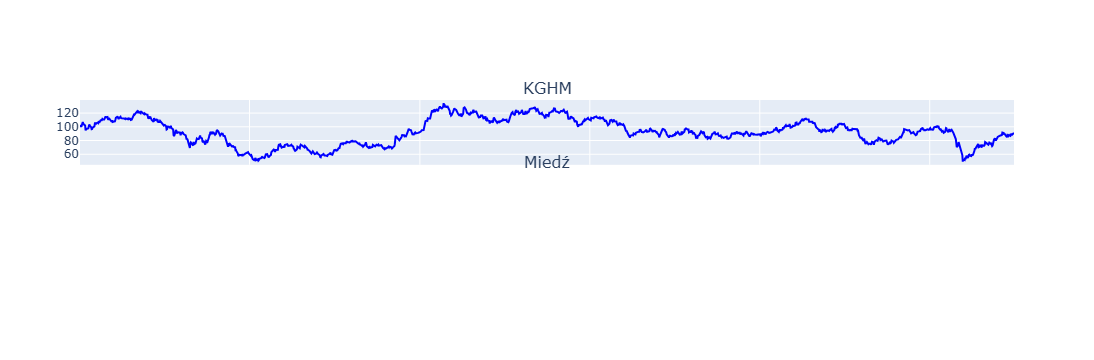

In [6]:
fig.add_trace(
    go.Scatter(
        x=df["Data"],
        y=df["Zamkniecie_KGHM"],
        mode="lines",
        name="KGHM",
        line=dict(color="blue")
    ),
    row=1, col=1
)

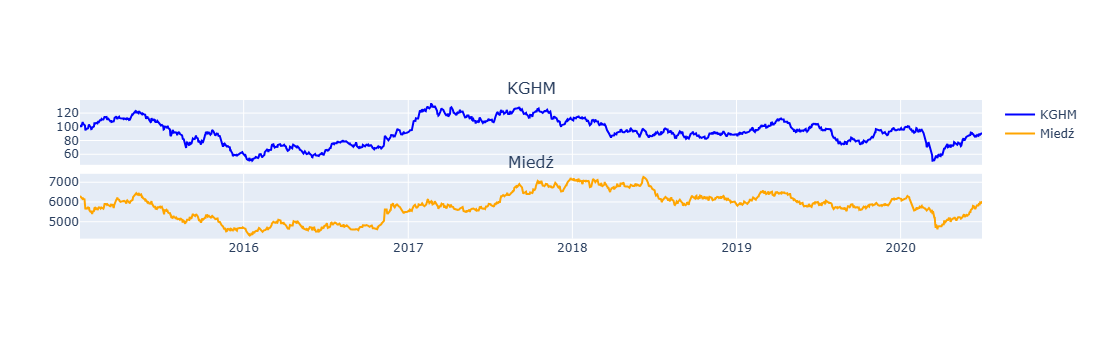

In [7]:
fig.add_trace(
    go.Scatter(
        x=df["Data"],
        y=df["Zamkniecie_Miedz"],
        mode="lines",
        name="Miedź",
        line=dict(color="orange")
    ),
    row=2, col=1
)

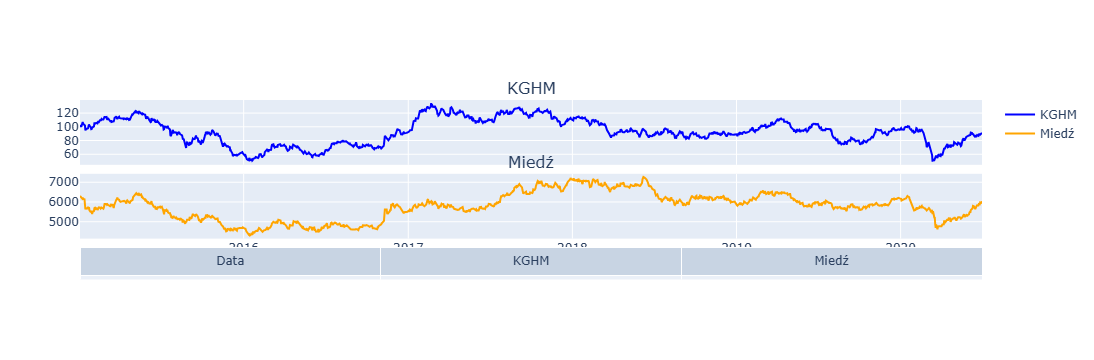

In [8]:
fig.add_trace(
    go.Table(
        header=dict(
            values=["Data", "KGHM", "Miedź"]
        ),
        cells=dict(
            values=[
                df["Data"].dt.strftime("%Y-%m-%d"),
                df["Zamkniecie_KGHM"],
                df["Zamkniecie_Miedz"]
            ]
        )
    ),
    row=3, col=1
)


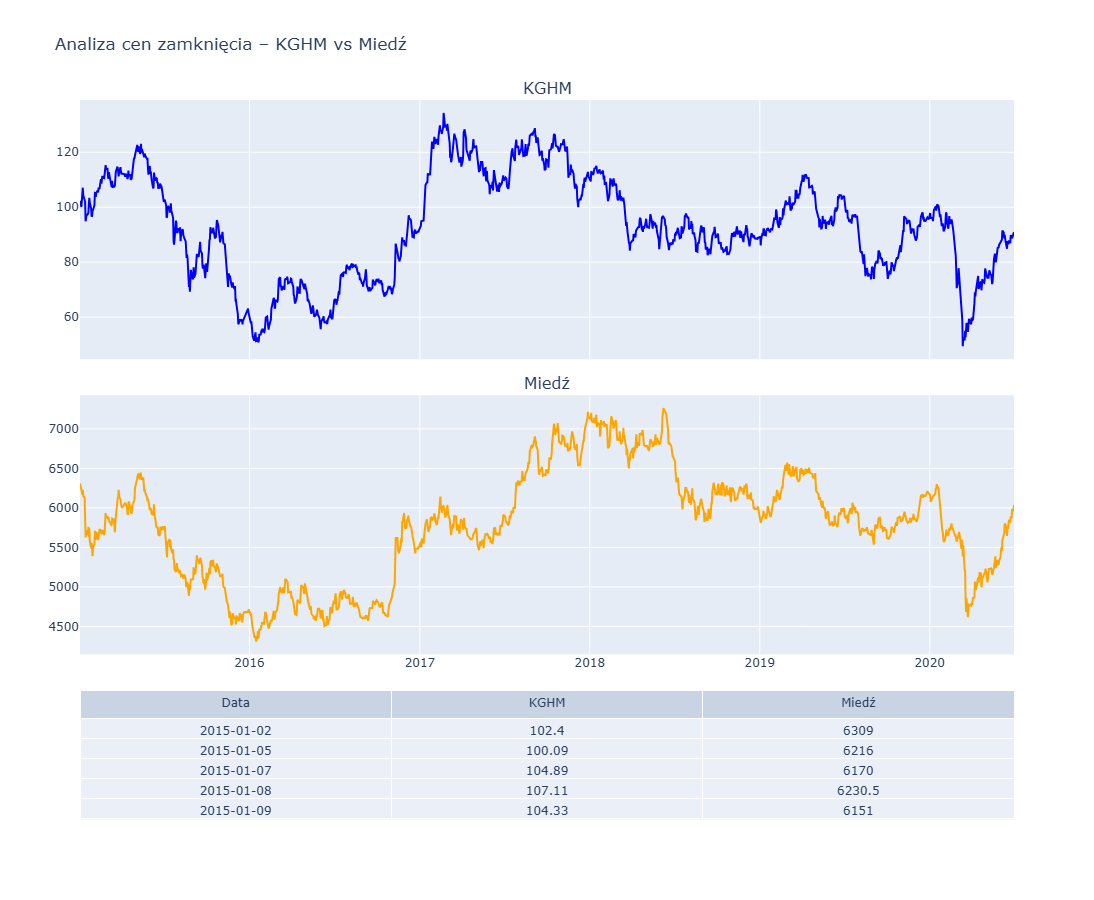

In [9]:
fig.update_layout(
    height=900,
    title="Analiza cen zamknięcia – KGHM vs Miedź",
    showlegend=False
)

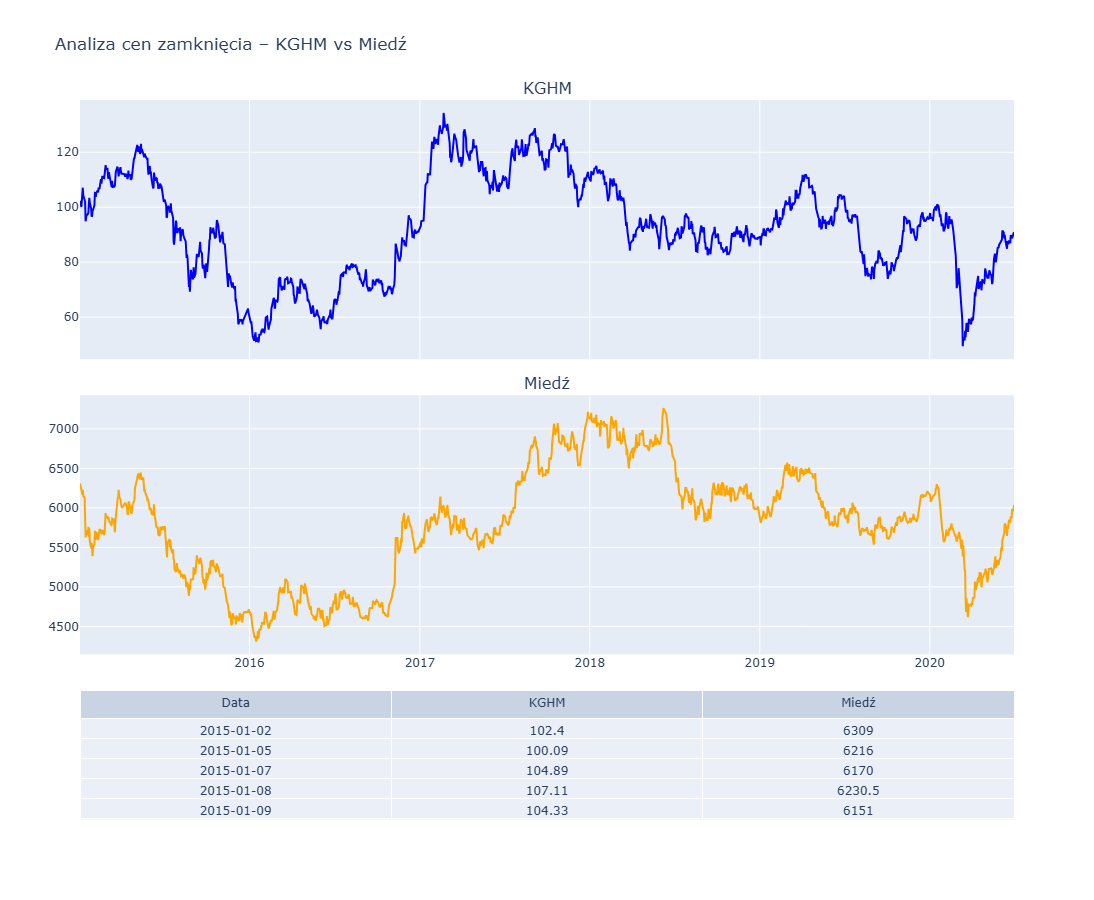

In [10]:
fig.show()